In [1]:
# importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [2]:
# using pandas reading csv file and store it in a dataframe

path = r"C:\Users\nvish\Downloads\Customer-Churn-Records.csv"

df = pd.read_csv(path)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
# check for 

df.shape

(10000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [9]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [10]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

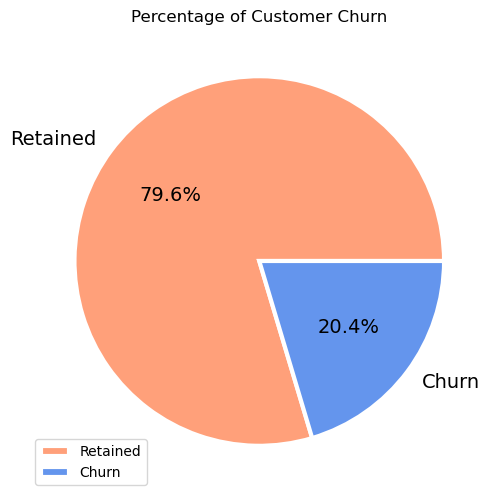

In [11]:
count=df['Exited'].value_counts()
label=['Retained','Churn']
plt.figure(figsize=(6,6))
plt.title("Percentage of Customer Churn")
plt.pie(count,autopct='%1.1f%%',labels=label,textprops={"fontsize":14},colors=['#FFA07A', '#6495ED'],wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.legend(loc='lower left')
plt.show()

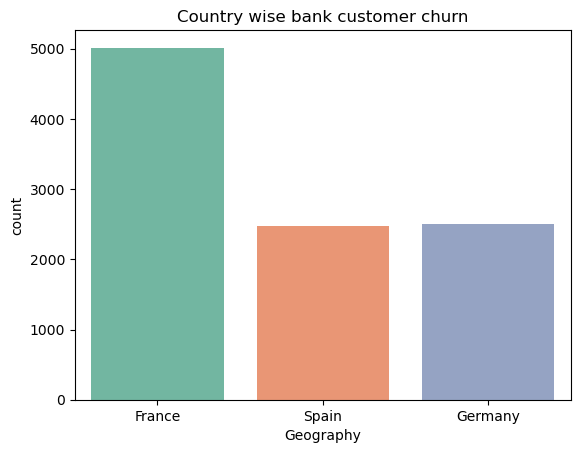

In [12]:
sns.countplot(x = 'Geography', palette = 'Set2', data = df)
plt.title("Country wise bank customer churn")
plt.show()

In [13]:
le = LabelEncoder()
cols=['Geography','Gender','Card Type']
for j in cols:
  df[j]=le.fit_transform(df[j])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339


In [14]:
file_path = 'data/Dataset-3_pre-processed_file.csv'
df.to_csv(file_path, index=False)

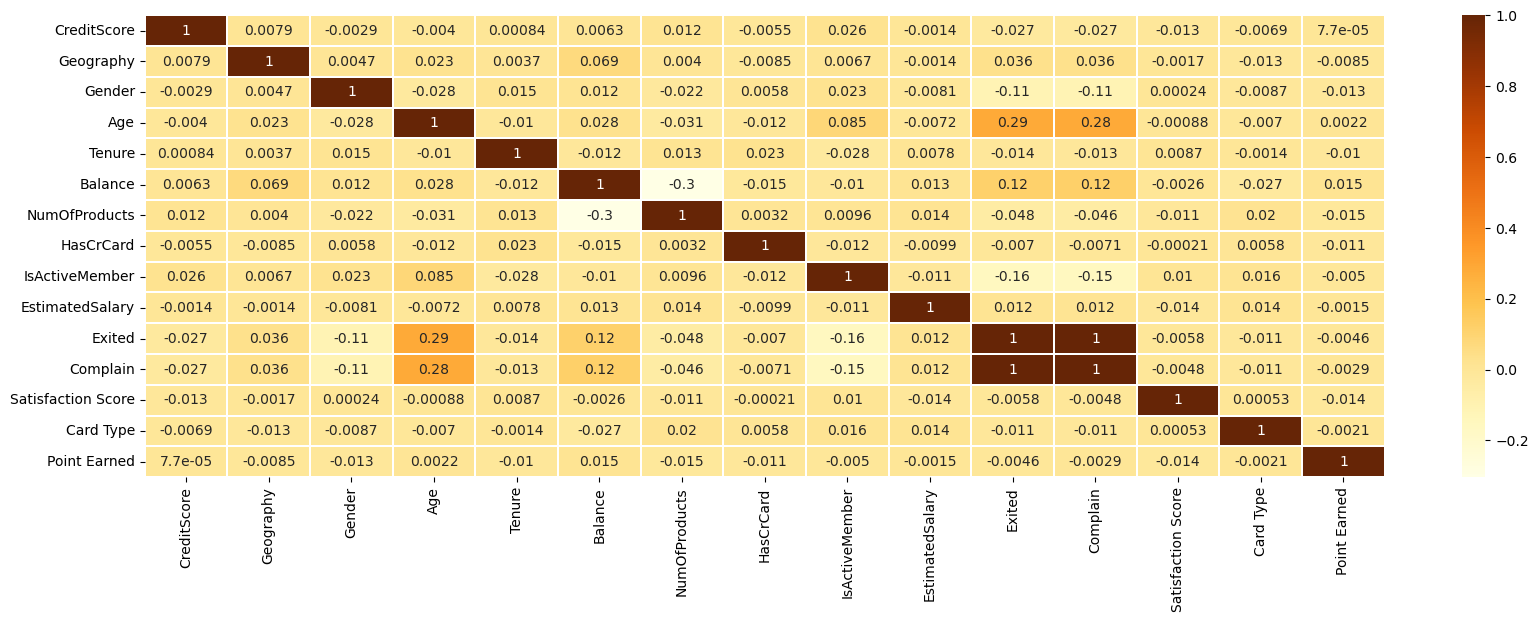

In [15]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,cmap="YlOrBr")
plt.show()

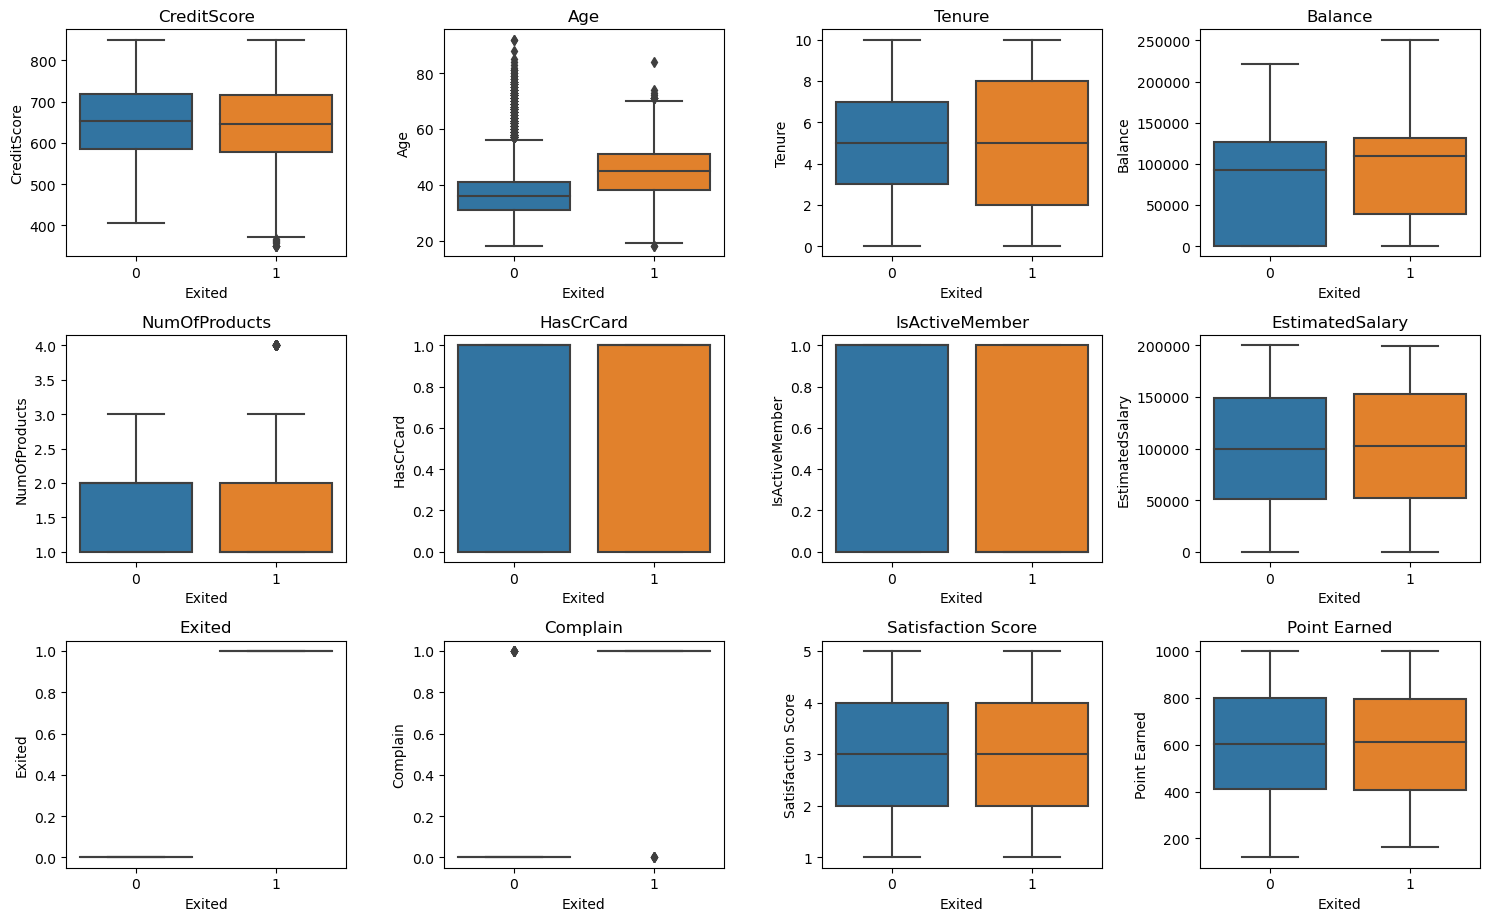

In [16]:
df_numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
x = df.drop(columns=['Exited'])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1,0,300
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,5,2,771
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,3,3,564
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2,1,339


In [18]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
# Over sampling technique is used to balance the dataset

os=SMOTE(random_state=42)
x_os,y_os=os.fit_resample(x,y)

In [20]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(x_os)
X_scaled

array([[0.538     , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.39160045],
       [0.516     , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.38251986],
       [0.304     , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.29284904],
       ...,
       [0.54      , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.89557321],
       [0.614     , 0.        , 0.        , ..., 0.5       , 0.33333333,
        0.60045403],
       [0.726     , 0.        , 0.        , ..., 0.75      , 0.        ,
        0.30646992]])

In [21]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y_os,test_size=0.3,random_state=1)

In [23]:
dec=DecisionTreeClassifier(max_depth=25,random_state=42)
dec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25, random_state=42)

In [24]:
y_pred=dec.predict(X_test)

In [25]:
print("Accuracy_Score:",accuracy_score(y_pred,y_test))
print("\nF1_Score:",f1_score(y_pred,y_test))

Accuracy_Score: 0.9026789451653412

F1_Score: 0.904143475572047



Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.91      0.90      2340
           1       0.91      0.90      0.90      2438

    accuracy                           0.90      4778
   macro avg       0.90      0.90      0.90      4778
weighted avg       0.90      0.90      0.90      4778


Confusion Matrix Display:



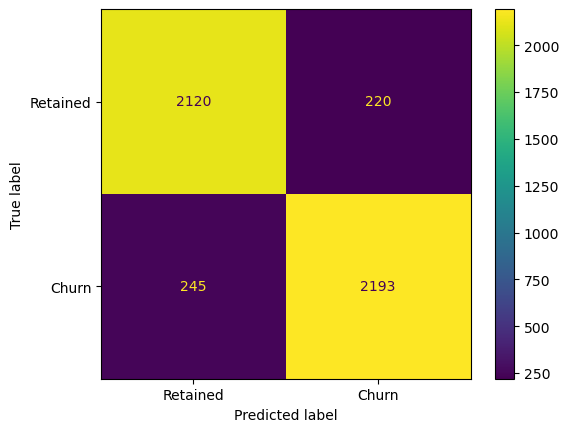

In [26]:
print("\nClassification Report:")
print("\n",classification_report(y_pred,y_test))
print("\nConfusion Matrix Display:")
print("\n",ConfusionMatrixDisplay.from_predictions(y_pred,y_test,display_labels=['Retained','Churn']))